In [1]:
#distancias de cada origen a cada destino:
import pandas as pd 
estaciones_csv = pd.read_csv("estaciones_bicis .csv")
estaciones_csv.head()

,ID,NUMERO,NOMBRE,DIRECCION,BARRIO,COMUNA,EMPLAZAMIENTO,ANCLAJES,QUEDA ABIERTA,Latitud,Longitud
0,202,1,FACULTAD DE DERECHO,"2120 Figueroa Alcorta, Pres. Av.",RECOLETA,COMUNA 2,VEREDA,30.0,1,-34.5842,-58.3905
1,2,2,RETIRO I,"Ramos Mejia, Jose Maria, Dr. Av. & Del Liberta...",RETIRO,COMUNA 1,PLAZA ABIERTA,36.0,1,-34.5927,-58.3751
2,3,3,ADUANA,Moreno & Azopardo,MONSERRAT,COMUNA 1,VEREDA,20.0,1,-34.6112,-58.3696
3,4,4,PLAZA ROMA,Lavalle & Bouchard,SAN NICOLAS,COMUNA 1,CALZADA,20.0,1,-34.6018,-58.3691
4,5,5,PLAZA ITALIA,2601 Sarmiento Av.,PALERMO,COMUNA 14,VEREDA,42.0,1,-34.5808,-58.4204


In [2]:
marzo = pd.read_csv("febrero_dataset.csv")
marzo.head()

,Id_recorrido,duracion_recorrido,fecha_origen_recorrido,id_estacion_origen,nombre_estacion_origen,id_estacion_destino,nombre_estacion_destino,id_usuario,género
0,17339621BAEcobici,"5,697",2023-02-25 15:17:19,33BAEcobici,033 - Facultad de Medicina,169BAEcobici,169 - FACULTAD DE PSICOLOGIA,861265BAEcobici,MALE
1,17176001BAEcobici,307,2023-02-08 07:51:20,248BAEcobici,346 - Plaza Zapiola,257BAEcobici,264 - Plaza Marcos Sastre,181148BAEcobici,FEMALE
2,17323598BAEcobici,354,2023-02-23 21:50:33,200BAEcobici,200 - AUSTRIA Y FRENCH,30BAEcobici,030 - Peña,870951BAEcobici,MALE
3,17269997BAEcobici,477,2023-02-17 12:04:25,236BAEcobici,254 - Plaza Rafael Hernandez,230BAEcobici,259 - PLAZA CASTELLI,464674BAEcobici,FEMALE
4,17184673BAEcobici,"1,778",2023-02-08 20:06:20,130BAEcobici,130 - RETIRO II,164BAEcobici,164 - FACULTAD DE INGENIERIA,702678BAEcobici,MALE


In [3]:
''' la idea es que de cada viaje de marzo se calcule la distancia entre estaciones. para
eso se agregarian a cada viaje, las coordenadas de origen y las coordenadas de salida, y una columna con la distancia entre medio''' 


' la idea es que de cada viaje de marzo se calcule la distancia entre estaciones. para\neso se agregarian a cada viaje, las coordenadas de origen y las coordenadas de salida, y una columna con la distancia entre medio'

In [4]:
def crearFormatID(fila):
    #La funcion devuelve la cadena concatenada de el indice con 3 cifras y el nombre
    id = str(fila[1]).zfill(3)
    return f"{str(id)} - {str(fila[2])}"
estaciones_csv["FormatId"] = estaciones_csv.apply(crearFormatID, axis=1)
estaciones_csv.head()

,ID,NUMERO,NOMBRE,DIRECCION,BARRIO,COMUNA,EMPLAZAMIENTO,ANCLAJES,QUEDA ABIERTA,Latitud,Longitud,FormatId
0,202,1,FACULTAD DE DERECHO,"2120 Figueroa Alcorta, Pres. Av.",RECOLETA,COMUNA 2,VEREDA,30.0,1,-34.5842,-58.3905,001 - FACULTAD DE DERECHO
1,2,2,RETIRO I,"Ramos Mejia, Jose Maria, Dr. Av. & Del Liberta...",RETIRO,COMUNA 1,PLAZA ABIERTA,36.0,1,-34.5927,-58.3751,002 - RETIRO I
2,3,3,ADUANA,Moreno & Azopardo,MONSERRAT,COMUNA 1,VEREDA,20.0,1,-34.6112,-58.3696,003 - ADUANA
3,4,4,PLAZA ROMA,Lavalle & Bouchard,SAN NICOLAS,COMUNA 1,CALZADA,20.0,1,-34.6018,-58.3691,004 - PLAZA ROMA
4,5,5,PLAZA ITALIA,2601 Sarmiento Av.,PALERMO,COMUNA 14,VEREDA,42.0,1,-34.5808,-58.4204,005 - PLAZA ITALIA


In [5]:
distanciaEntreEstaciones = pd.DataFrame()

In [6]:
import unicodedata
def procesar_string(input_string):
    # Convertir a mayúsculas
    input_string = input_string.upper()
    # Eliminar tildes
    input_string = ''.join((c for c in unicodedata.normalize('NFD', input_string) if unicodedata.category(c) != 'Mn'))
    input_string.strip()
    input_string = input_string.replace("-", " - ")
    return input_string
def getLatitud(estacion):
    #print(estacion)
    return latitudEstaciones.get(estacion,None)
def getLongitud(estacion):
    #print(estacion)
    return longitudEstaciones.get(estacion,None)
def to_upper(nombre): 
    return nombre.upper() 
def convertir_a_entero(valor):
    if ',' in valor:
        # Eliminar la coma si está presente
        valor = valor.replace(',', '')
    # Convertir a entero
    return int(valor)


In [7]:
estaciones_csv = estaciones_csv[['FormatId','Latitud','Longitud']] 
estaciones_csv['FormatId'] = estaciones_csv['FormatId'].apply(procesar_string)
estaciones_csv

,FormatId,Latitud,Longitud
0,001 - FACULTAD DE DERECHO,-34.5842,-58.3905
1,002 - RETIRO I,-34.5927,-58.3751
2,003 - ADUANA,-34.6112,-58.3696
3,004 - PLAZA ROMA,-34.6018,-58.3691
4,005 - PLAZA ITALIA,-34.5808,-58.4204
...,...,...,...
466,314 - ALLENDE,-34.6147,-58.5116
467,266 - PLAZA SABATTINI,-34.6124,-58.4433
468,055 - HABANA,-34.5865,-58.4949
469,041 - PARQUE PATRICIOS II,-34.6374,-58.4057


In [8]:
estaciones_csv.describe()

,Latitud,Longitud
count,471.000000,471.000000
mean,-34.603935,-58.431409
std,0.028303,0.041611
min,-34.683200,-58.521700
25%,-34.623250,-58.464900
50%,-34.604800,-58.432800
75%,-34.585400,-58.397050
max,-34.541400,-58.355600


In [9]:
latitudEstaciones = {}
longitudEstaciones = {}
for index, row in estaciones_csv.iterrows(): 
    nombre_estacion = row['FormatId'].upper()
    latitud = row['Latitud']
    longitud = row['Longitud']
    if nombre_estacion not in latitudEstaciones:
        latitudEstaciones[nombre_estacion] = latitud
        longitudEstaciones[nombre_estacion] = longitud

In [10]:
estaciones_csv.sort_values('FormatId').iloc[350:360]

,FormatId,Latitud,Longitud
326,305 - PLAZA MARTIN RODRIGUEZ,-34.5910,-58.5003
327,306 - TRES ARROYOS Y OLAYA,-34.6024,-58.4488
464,307 - CERETTI,-34.5743,-58.4961
328,307 - LEONARDO PEREYRA,-34.6506,-58.3873
329,308 - ARTIGAS Y MELINCUE,-34.5980,-58.4858
330,309 - HOMERO MANZI,-34.6449,-58.4316
331,309 - UTN II,-34.6605,-58.4676
450,310 - FREIRE II,-34.5799,-58.4443
332,310 - GREGORIA PEREZ,-34.5764,-58.4546
333,311 - CONCORDIA,-34.6290,-58.4770


In [11]:
distanciaEntreEstaciones['Id_recorrido'] = marzo['Id_recorrido']
distanciaEntreEstaciones['estacion_origen'] = marzo['nombre_estacion_origen'].apply(procesar_string)
distanciaEntreEstaciones['estacion_destino'] = marzo['nombre_estacion_destino'].apply(procesar_string) 
distanciaEntreEstaciones['duracion_recorrido'] = marzo['duracion_recorrido'].apply(convertir_a_entero)

distanciaEntreEstaciones['latitud_origen'] = distanciaEntreEstaciones['estacion_origen'].apply(getLatitud)
distanciaEntreEstaciones['longitud_origen'] = distanciaEntreEstaciones['estacion_origen'].apply(getLongitud)
distanciaEntreEstaciones['latitud_destino'] = distanciaEntreEstaciones['estacion_destino'].apply(getLatitud)
distanciaEntreEstaciones['longitud_destino'] = distanciaEntreEstaciones['estacion_destino'].apply(getLongitud)
distanciaEntreEstaciones

,Id_recorrido,estacion_origen,estacion_destino,duracion_recorrido,latitud_origen,longitud_origen,latitud_destino,longitud_destino
0,17339621BAEcobici,033 - FACULTAD DE MEDICINA,169 - FACULTAD DE PSICOLOGIA,5697,-34.5972,-58.3988,-34.6118,-58.4117
1,17176001BAEcobici,346 - PLAZA ZAPIOLA,264 - PLAZA MARCOS SASTRE,307,-34.5737,-58.4743,-34.5711,-58.4809
2,17323598BAEcobici,200 - AUSTRIA Y FRENCH,030 - PENA,354,-34.5883,-58.4043,-34.5906,-58.3974
3,17269997BAEcobici,254 - PLAZA RAFAEL HERNANDEZ,259 - PLAZA CASTELLI,477,-34.5625,-58.4552,-34.5679,-58.4642
4,17184673BAEcobici,130 - RETIRO II,164 - FACULTAD DE INGENIERIA,1778,-34.5927,-58.3750,-34.6173,-58.3669
...,...,...,...,...,...,...,...,...
9995,17267899BAEcobici,218 - CAMPANA,215 - HOSPITAL ALVAREZ,617,-34.6168,-58.4842,-34.6231,-58.4684
9996,17296509BAEcobici,287 - BELAUSTEGUI,031 - PADILLA,1727,-34.6164,-58.4772,-34.6031,-58.4397
9997,17249022BAEcobici,208 - NICASIO ORONO,104 - FEDERICO LACROZE,396,-34.5964,-58.4594,-34.5876,-58.4551
9998,17119673BAEcobici,142 - ARMENIA,033 - FACULTAD DE MEDICINA,1070,NaN,NaN,-34.5972,-58.3988


In [12]:
print(distanciaEntreEstaciones.latitud_origen.isnull().sum() ,
distanciaEntreEstaciones.latitud_destino.isnull().sum() ) 

517 481


In [13]:
distanciaEntreEstaciones = distanciaEntreEstaciones[distanciaEntreEstaciones.latitud_origen.notna()]
distanciaEntreEstaciones = distanciaEntreEstaciones[distanciaEntreEstaciones.latitud_destino.notna()]
#distanciaEntreEstaciones le quedaron 9120 filas

In [14]:
from math import radians, sin, cos, sqrt, atan2

def haversine_distance(lat1, lon1, lat2, lon2):
    # Convertir las coordenadas de grados a radianes
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

    # Calcular las diferencias de latitud y longitud
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    # Calcular la distancia utilizando la fórmula de haversine
    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    # Radio de la Tierra en kilómetros
    radius = 6371.0

    # Calcular la distancia
    distance = radius * c

    return distance

# Ejemplo de uso
lat_origen = 40.7128
lon_origen = -74.0060
lat_destino = 34.0522
lon_destino = -118.2437

distancia = haversine_distance(lat_origen, lon_origen, lat_destino, lon_destino)
print(f"La distancia entre los puntos es: {distancia:.2f} km")


La distancia entre los puntos es: 3935.75 km


In [15]:
distanciaEntreEstaciones['distancia_de_viaje'] = distanciaEntreEstaciones.apply(lambda fila: haversine_distance(
    fila["latitud_origen"], fila["longitud_origen"], fila["latitud_destino"], fila["longitud_destino"]), axis=1)
distanciaEntreEstaciones

,Id_recorrido,estacion_origen,estacion_destino,duracion_recorrido,latitud_origen,longitud_origen,latitud_destino,longitud_destino,distancia_de_viaje
0,17339621BAEcobici,033 - FACULTAD DE MEDICINA,169 - FACULTAD DE PSICOLOGIA,5697,-34.5972,-58.3988,-34.6118,-58.4117,2.007367
1,17176001BAEcobici,346 - PLAZA ZAPIOLA,264 - PLAZA MARCOS SASTRE,307,-34.5737,-58.4743,-34.5711,-58.4809,0.669887
2,17323598BAEcobici,200 - AUSTRIA Y FRENCH,030 - PENA,354,-34.5883,-58.4043,-34.5906,-58.3974,0.681440
3,17269997BAEcobici,254 - PLAZA RAFAEL HERNANDEZ,259 - PLAZA CASTELLI,477,-34.5625,-58.4552,-34.5679,-58.4642,1.019651
4,17184673BAEcobici,130 - RETIRO II,164 - FACULTAD DE INGENIERIA,1778,-34.5927,-58.3750,-34.6173,-58.3669,2.834073
...,...,...,...,...,...,...,...,...,...
9994,17157755BAEcobici,275 - PLAZA 24 DE SEPTIEMBRE,187 - JOSE MARIA MORENO,713,-34.6071,-58.4485,-34.6202,-58.4356,1.874961
9995,17267899BAEcobici,218 - CAMPANA,215 - HOSPITAL ALVAREZ,617,-34.6168,-58.4842,-34.6231,-58.4684,1.606577
9996,17296509BAEcobici,287 - BELAUSTEGUI,031 - PADILLA,1727,-34.6164,-58.4772,-34.6031,-58.4397,3.737003
9997,17249022BAEcobici,208 - NICASIO ORONO,104 - FEDERICO LACROZE,396,-34.5964,-58.4594,-34.5876,-58.4551,1.054714


In [16]:
distanciaEntreEstaciones.to_csv("distancia_de_viaje_febrero.csv", index = False)

/run/user/1000/app/org.jupyter.JupyterLab/ipykernel_5518/1642546609.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(distanciaEntreEstaciones['distancia_de_viaje'])


<Axes: xlabel='distancia_de_viaje', ylabel='Density'>

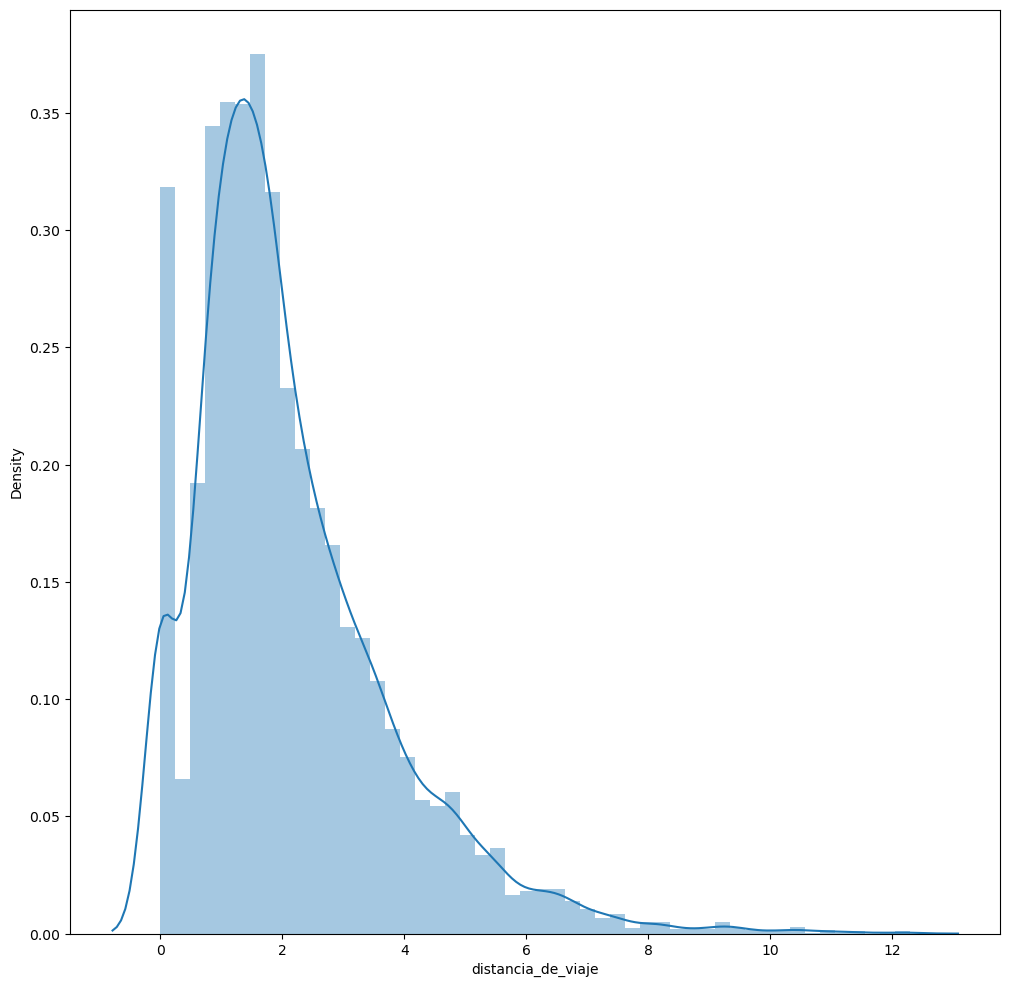

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt 
plt.figure(figsize=(12,12))
sns.distplot(distanciaEntreEstaciones['distancia_de_viaje'])